<a href="https://colab.research.google.com/github/seBEYER2024/Modelo-de-Examen-Final-Tipo-2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# prompt: arme un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
materias = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Ciencias Naturales', 'Ciencias Sociales', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Informática']
apellidos = ['Gómez', 'Rodríguez', 'López', 'Fernández', 'García', 'Martínez', 'Pérez', 'González', 'Sánchez', 'Romero']
nombres = ['Juan', 'Pedro', 'Maria', 'Ana', 'Luis', 'Sofia', 'Carlos', 'Laura', 'Diego', 'Valentina']


# Create DataFrame with 100 rows
num_rows = 100
data = {
    'Apellido': [random.choice(apellidos) for _ in range(num_rows)],
    'Nombre': [random.choice(nombres) for _ in range(num_rows)],
    'nro_dni': [random.randint(10000000, 99999999) for _ in range(num_rows)],
    'materia_escolar': [random.choice(materias) for _ in range(num_rows)],
    'nota_1er_trimestre': [random.randint(1, 10) for _ in range(num_rows)],
    'nota_2do_trimestre': [random.randint(1, 10) for _ in range(num_rows)],
    'nota_3er_trimestre': [random.randint(1, 10) for _ in range(num_rows)],
    'faltas_a_clases': [random.randint(0, 20) for _ in range(num_rows)]
}

df = pd.DataFrame(data)

df

,Apellido,Nombre,nro_dni,materia_escolar,nota_1er_trimestre,nota_2do_trimestre,nota_3er_trimestre,faltas_a_clases
0,Sánchez,Pedro,94930880,Lengua,1,2,1,4
1,Gómez,Juan,87061675,Música,9,5,8,18
2,Gómez,Ana,76612496,Geografía,6,4,10,11
3,Rodríguez,Pedro,25356076,Música,3,6,4,9
4,Gómez,Juan,75687279,Geografía,5,3,10,10
...,...,...,...,...,...,...,...,...
95,García,Maria,38179708,Inglés,7,7,8,16
96,Pérez,Pedro,24369697,Matemática,8,10,3,20
97,Martínez,Sofia,61191763,Inglés,5,4,8,19
98,Romero,Maria,50094038,Artes,1,4,10,11


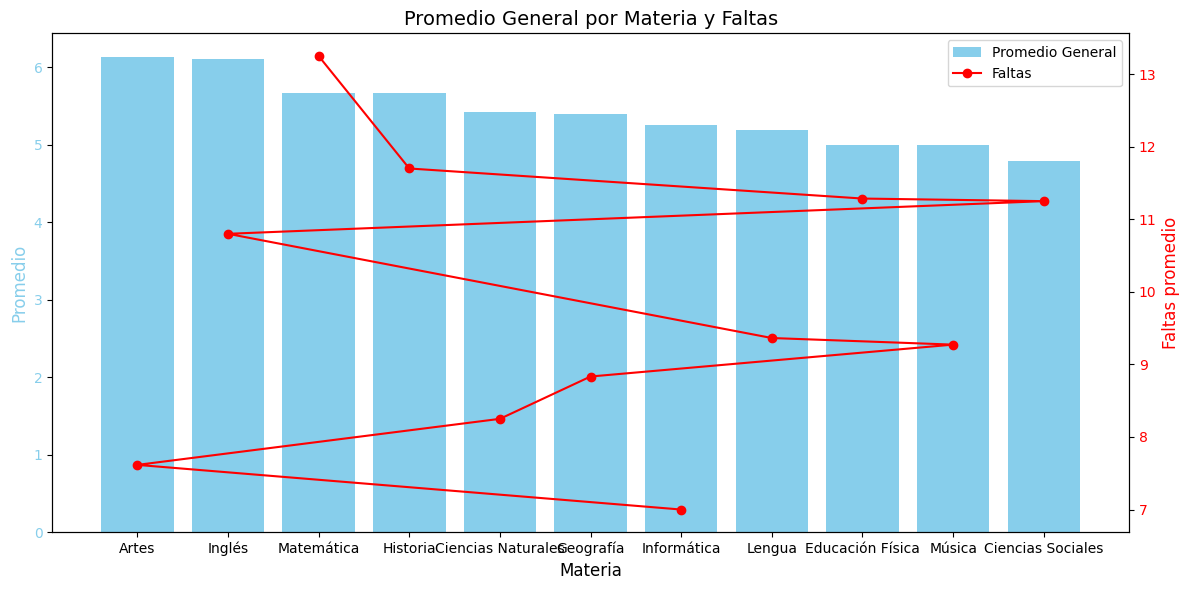

In [14]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
df['Promedio'] = (df['nota_1er_trimestre'] + df['nota_2do_trimestre'] + df['nota_3er_trimestre']) / 3
average_grades = df.groupby('materia_escolar')['Promedio'].mean().sort_values(ascending=False)
average_absences = df.groupby('materia_escolar')['faltas_a_clases'].mean().sort_values(ascending=False)

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average grades
ax1.bar(average_grades.index, average_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia', fontsize=12)
ax1.set_ylabel('Promedio', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General por Materia y Faltas', fontsize=14)

# Line chart for average absences
ax2 = ax1.twinx()
ax2.plot(average_absences.index, average_absences.values, color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas promedio', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Customize the chart
plt.xticks(rotation=45, ha='right')
fig.tight_layout()

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

In [15]:
df.to_csv("datos_alumnos.csv", index=False)